In [ ]:
# Initial imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import the reviews
df_raw_i = pd.read_csv('RAW_interactions.csv')

In [ ]:
# Display the reviews to check
df_raw_i

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [ ]:
# Drop reviews without a review

df_raw_i.dropna(subset=['review'], inplace=True)

In [ ]:
# Make date a datetime type to filter by year
df_raw_i['date'] = pd.to_datetime(df_raw_i['date'])

# Filter data for the year 2001
df_2001_i = df_raw_i[df_raw_i['date'].dt.year == 2001]

In [ ]:
# Check that data is filtered
df_2001_i

,user_id,recipe_id,date,rating,review
310,21694,5139,2001-10-22,5,"Very good, wonderful dinner during cold nights."
1564,18660,12572,2001-11-02,5,The combination of crescent rolls and savory c...
2087,4005,8507,2001-04-22,5,"This is a delicious, healthy and beautiful sal..."
2088,8000,8507,2001-06-12,5,"Sounds good. I would mince the basil, and pla..."
2089,12756,8507,2001-07-17,5,"This recipe is *awesome*, but here's a nifty l..."
...,...,...,...,...,...
1082831,18391,14946,2001-12-19,3,I didn't really like these pancakes .. I wante...
1083932,25347,15038,2001-12-28,5,I personally think this recipe is awesome. My ...
1087161,23728,16026,2001-12-26,5,"This was terrific, worked like a champ!"
1091790,16140,1136,2001-09-07,5,"This was very good,i did add more garlic and u..."


In [ ]:
# Import recipe data
df_raw_r = pd.read_csv('RAW_recipes.csv')

In [ ]:
# Check recipe data
df_raw_r

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [ ]:
# Make submitted a datetime type to filter by year
df_raw_r['submitted'] = pd.to_datetime(df_raw_r['submitted'])

# Filter data for the year 2001
df_2001_r = df_raw_r[df_raw_r['submitted'].dt.year == 2001]

In [ ]:
Make 0 ratings null instead

df_2001_i.loc[:, 'rating'] = df_2001_i['rating'].replace(0, np.nan)

<ipython-input-12-2585b864e0e9>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[5. 5. 5. ... 5. 5. 4.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_2001_i.loc[:, 'rating'] = df_2001_i['rating'].replace(0, np.nan)


In [ ]:
# Import textblob for sentiment analysis
from textblob import TextBlob

# Do sentiment analysis on all the reviews
df_2001_i['sentiment'] = df_2001_i['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

<ipython-input-13-d6b758060c1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2001_i['sentiment'] = df_2001_i['review'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [ ]:
# Group by recipe ID and calculate the average rating and sentiment and review count
recipe_stats = df_2001_i.groupby('recipe_id').agg(
    average_rating=('rating', 'mean'),
    average_sentiment=('sentiment', 'mean'),
    number_of_reviews=('review', 'count')
)

# Merge the average rating, sentiment, and number of ratings back into
df_2001_r = pd.merge(df_2001_r, recipe_stats, left_on='id', right_index=True, how='left')

df_2001_r = df_2001_r[df_2001_r['number_of_ratings'] > 1]

In [ ]:
# Check new columns
df_2001_r

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,average_rating,average_sentiment,number_of_ratings
1409,3rd serving meatloaf,9064,75,9690,2001-05-22,"['weeknight', 'time-to-make', 'main-ingredient...","[604.0, 47.0, 76.0, 46.0, 80.0, 59.0, 13.0]",3,['meatloaf: pour milk over bread crumbs stir u...,it's a family recipe that has been treasured f...,"['dry breadcrumbs', 'milk', 'ground beef', 'eg...",13,4.142857,0.317922,7.0
4556,amazing apple pie,10263,55,12392,2001-07-18,"['60-minutes-or-less', 'time-to-make', 'course...","[376.7, 36.0, 79.0, 12.0, 6.0, 30.0, 12.0]",9,"['combine 1 cup flour , 1 tbsp sugar , egg , s...","makes its own crust as it bakes. again, this w...","['sliced apples', 'lemon juice', 'sugar', 'sel...",9,4.000000,0.608889,3.0
4710,amazing stuffed shrooms,12100,30,16459,2001-09-25,"['30-minutes-or-less', 'time-to-make', 'course...","[67.6, 3.0, 5.0, 8.0, 6.0, 5.0, 2.0]",9,"['wash mushrooms and remove stems', 'chop stem...",my husband's friend mark introduced me to this...,"['mushrooms', 'seasoned bread crumbs', 'cream ...",5,5.000000,0.152778,2.0
5842,anti martha stewart meatloaf,13256,105,15913,2001-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[429.8, 49.0, 21.0, 33.0, 53.0, 56.0, 2.0]",6,"['begin preheating oven to 350 degrees', 'comb...","warning: this recipe contains crackers, which ...","['ground beef', 'pork sausage', 'onion', 'egg'...",10,4.000000,0.587500,2.0
6446,apple cheesecake pie,14218,40,20754,2001-11-13,"['60-minutes-or-less', 'time-to-make', 'course...","[368.6, 29.0, 123.0, 10.0, 10.0, 39.0, 15.0]",13,"['preheat oven to 325 degrees', 'combine cream...",simply delicious!,"['graham cracker pie crusts', 'cream cheese', ...",8,4.500000,0.716333,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225895,white bean and pasta soup with sun dried tomatoes,13452,115,20114,2001-10-29,"['weeknight', 'time-to-make', 'course', 'main-...","[500.3, 23.0, 45.0, 24.0, 46.0, 14.0, 23.0]",15,['soak beans overnight in enough water to cove...,i have been making this recipe for so many yea...,"['dried white bean', 'olive oil', 'yellow onio...",13,5.000000,0.546354,4.0
226617,white trash candy snack,15688,300,13063,2001-12-12,"['weeknight', 'time-to-make', 'course', 'main-...","[469.1, 43.0, 180.0, 3.0, 15.0, 70.0, 16.0]",4,['mix all of the dry ingredients in a large bo...,"no, not your new neighbors; this no-bake candy...","['chex cereal', 'cheerios toasted oat cereal',...",5,4.500000,0.299444,2.0
227193,wholly guacamole,8739,20,7802,2001-04-09,"['30-minutes-or-less', 'time-to-make', 'course...","[500.7, 68.0, 14.0, 0.0, 13.0, 32.0, 10.0]",13,"['cut avocados in half , remove pit , and spoo...",this is a true tex-mex recipe concocted by a d...,"['avocados', 'garlic cloves', 'lime', 'tomatoe...",8,5.000000,0.507192,6.0
228062,wonderful salsa,9272,75,9579,2001-06-02,"['weeknight', 'time-to-make', 'course', 'main-...","[12.5, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0]",5,['mix all together and bring to a slow boil fo...,this is the best salsa recipe i've found so fa...,"['tomatoes', 'onions', 'green peppers', 'jalap...",12,4.965517,0.487808,29.0


In [ ]:
# Filter df_2001_i to only include entries where recipe_id is an id in df_2001_r
df_2001_i = df_2001_i[df_2001_i['recipe_id'].isin(df_2001_r['id'])]

In [ ]:
# Check it was sucessful
df_2001_i

,user_id,recipe_id,date,rating,review,sentiment
5119,21987,12044,2001-10-24,5.0,This Is definitley the best stew i have had ye...,0.529062
5120,13348,12044,2001-11-16,5.0,This is a great stew for venison or beef. It'...,0.533333
5121,24217,12044,2001-11-27,5.0,"Great stew! I coat the meat with flour, salt a...",0.242308
7481,23326,14016,2001-11-10,NaN,I think this recipe is cruel as Squirrels are ...,0.187500
7482,23668,14016,2001-11-14,1.0,I agree with Guy. All of us who have been mem...,0.050000
...,...,...,...,...,...,...
1054697,26022,12980,2001-12-31,5.0,I didn't end up with enough because the large ...,0.200374
1054739,16459,12972,2001-11-20,5.0,Oh my Sam wasn't this just wonderful?,1.000000
1054740,25656,12972,2001-12-08,5.0,we ate this when we went to see sam a couple o...,0.850000
1065712,20371,13745,2001-12-13,5.0,These are truly the perfect addition to a xmas...,0.465167


In [ ]:
df_2001_r

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,average_rating,average_sentiment,number_of_ratings
1409,3rd serving meatloaf,9064,75,9690,2001-05-22,"['weeknight', 'time-to-make', 'main-ingredient...","[604.0, 47.0, 76.0, 46.0, 80.0, 59.0, 13.0]",3,['meatloaf: pour milk over bread crumbs stir u...,it's a family recipe that has been treasured f...,"['dry breadcrumbs', 'milk', 'ground beef', 'eg...",13,4.142857,0.317922,7.0
4556,amazing apple pie,10263,55,12392,2001-07-18,"['60-minutes-or-less', 'time-to-make', 'course...","[376.7, 36.0, 79.0, 12.0, 6.0, 30.0, 12.0]",9,"['combine 1 cup flour , 1 tbsp sugar , egg , s...","makes its own crust as it bakes. again, this w...","['sliced apples', 'lemon juice', 'sugar', 'sel...",9,4.000000,0.608889,3.0
4710,amazing stuffed shrooms,12100,30,16459,2001-09-25,"['30-minutes-or-less', 'time-to-make', 'course...","[67.6, 3.0, 5.0, 8.0, 6.0, 5.0, 2.0]",9,"['wash mushrooms and remove stems', 'chop stem...",my husband's friend mark introduced me to this...,"['mushrooms', 'seasoned bread crumbs', 'cream ...",5,5.000000,0.152778,2.0
5842,anti martha stewart meatloaf,13256,105,15913,2001-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[429.8, 49.0, 21.0, 33.0, 53.0, 56.0, 2.0]",6,"['begin preheating oven to 350 degrees', 'comb...","warning: this recipe contains crackers, which ...","['ground beef', 'pork sausage', 'onion', 'egg'...",10,4.000000,0.587500,2.0
6446,apple cheesecake pie,14218,40,20754,2001-11-13,"['60-minutes-or-less', 'time-to-make', 'course...","[368.6, 29.0, 123.0, 10.0, 10.0, 39.0, 15.0]",13,"['preheat oven to 325 degrees', 'combine cream...",simply delicious!,"['graham cracker pie crusts', 'cream cheese', ...",8,4.500000,0.716333,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225895,white bean and pasta soup with sun dried tomatoes,13452,115,20114,2001-10-29,"['weeknight', 'time-to-make', 'course', 'main-...","[500.3, 23.0, 45.0, 24.0, 46.0, 14.0, 23.0]",15,['soak beans overnight in enough water to cove...,i have been making this recipe for so many yea...,"['dried white bean', 'olive oil', 'yellow onio...",13,5.000000,0.546354,4.0
226617,white trash candy snack,15688,300,13063,2001-12-12,"['weeknight', 'time-to-make', 'course', 'main-...","[469.1, 43.0, 180.0, 3.0, 15.0, 70.0, 16.0]",4,['mix all of the dry ingredients in a large bo...,"no, not your new neighbors; this no-bake candy...","['chex cereal', 'cheerios toasted oat cereal',...",5,4.500000,0.299444,2.0
227193,wholly guacamole,8739,20,7802,2001-04-09,"['30-minutes-or-less', 'time-to-make', 'course...","[500.7, 68.0, 14.0, 0.0, 13.0, 32.0, 10.0]",13,"['cut avocados in half , remove pit , and spoo...",this is a true tex-mex recipe concocted by a d...,"['avocados', 'garlic cloves', 'lime', 'tomatoe...",8,5.000000,0.507192,6.0
228062,wonderful salsa,9272,75,9579,2001-06-02,"['weeknight', 'time-to-make', 'course', 'main-...","[12.5, 0.0, 7.0, 8.0, 0.0, 0.0, 0.0]",5,['mix all together and bring to a slow boil fo...,this is the best salsa recipe i've found so fa...,"['tomatoes', 'onions', 'green peppers', 'jalap...",12,4.965517,0.487808,29.0


In [ ]:
# Install surprise package for reccomender
!pip install surprise

# Import packages
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Make sure sentiment is numberic
df_2001_i.dropna(subset=['sentiment'], inplace=True)
df_2001_i['sentiment'] = pd.to_numeric(df_2001_i['sentiment'], errors='coerce')

# Collaborative Filtering with surprise package
reader = Reader(rating_scale=(-1, 1))
data = Dataset.load_from_df(df_2001_i[['user_id', 'recipe_id', 'sentiment']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)
print("Collaborative Filtering RMSE:", accuracy.rmse(predictions))

import numpy as np
from surprise import NormalPredictor

# Random Predictor (to compare)
random_algo = NormalPredictor()
random_algo.fit(trainset)
random_predictions = random_algo.test(testset)
print("Random Predictor RMSE:", accuracy.rmse(random_predictions))

# Fill null values with an empty string
df_2001_r['tags'] = df_2001_r['tags'].fillna('')
df_2001_r['description'] = df_2001_r['description'].fillna('')
df_2001_r['ingredients'] = df_2001_r['ingredients'].fillna('')
df_2001_r['steps'] = df_2001_r['steps'].fillna('')

# Combine features into a single string
df_2001_r['combined_features'] = (
    df_2001_r['tags'].astype(str) + ' ' +
    df_2001_r['description'].astype(str) + ' ' +
    df_2001_r['ingredients'].astype(str) + ' ' +
    df_2001_r['steps'].astype(str)
)

# Compute TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_2001_r['combined_features'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Reset index to ensure it aligns with recipe_id
df_2001_r = df_2001_r.reset_index(drop=True)

# Create a mapping from recipe_id to DataFrame index
recipe_id_to_index = {row['id']: idx for idx, row in df_2001_r.iterrows()}

def get_recommendations(recipe_id, cosine_sim=cosine_sim):
    # Convert recipe_id to DataFrame index
    idx = recipe_id_to_index.get(recipe_id)
    if idx is None:
        return "Recipe ID not found."

    # Calculate similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar recipes
    recipe_indices = [i[0] for i in sim_scores]
    return df_2001_r['name'].iloc[recipe_indices]

print("Content-Based Recommendations for Recipe ID 9064 (3rd serving meatloaf):")
print(get_recommendations(9064))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 10.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357277 sha256=1029e52b0d0bc55bee6ad06dcf25dde84ffee4f52f06bd1915bac596b2da1511
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise
RMSE: 0.2768
Collaborative Filtering RMSE: 0.27682998321376595
RMSE: 0.4247
Random Predictor RMSE: 0.424658153082135
Content-Based Recommendations for Recipe ID 9064 (3rd serving meatloaf):
270                                              taverns
142                                   homemade beefaroni
28     beef and potatoes with rosemary and thyme   cr...
139                      hamburger and yorkshire pudding
253                    southern barbecue

<ipython-input-20-d3558d15f537>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2001_i.dropna(subset=['sentiment'], inplace=True)
<ipython-input-20-d3558d15f537>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2001_i['sentiment'] = pd.to_numeric(df_2001_i['sentiment'], errors='coerce')


In [ ]:
# Add a mean predictor to evaluate model
average_rating = df_2001_i['sentiment'].mean()
average_predictions = [(uid, iid, average_rating) for (uid, iid, r) in testset]
# Convert the predictions to the format expected by accuracy.rmse
average_predictions = [ (uid, iid, r, average_rating, None) for uid, iid, r in testset]

print("Average Predictor RMSE:", accuracy.rmse(average_predictions))

RMSE: 0.2737
Average Predictor RMSE: 0.27365175894008664


RMSE: 0.2768
RMSE: 0.4247
RMSE: 0.2737


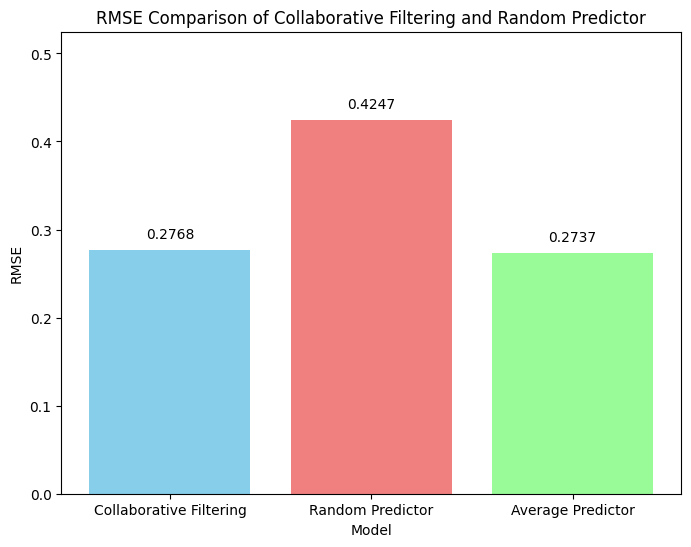

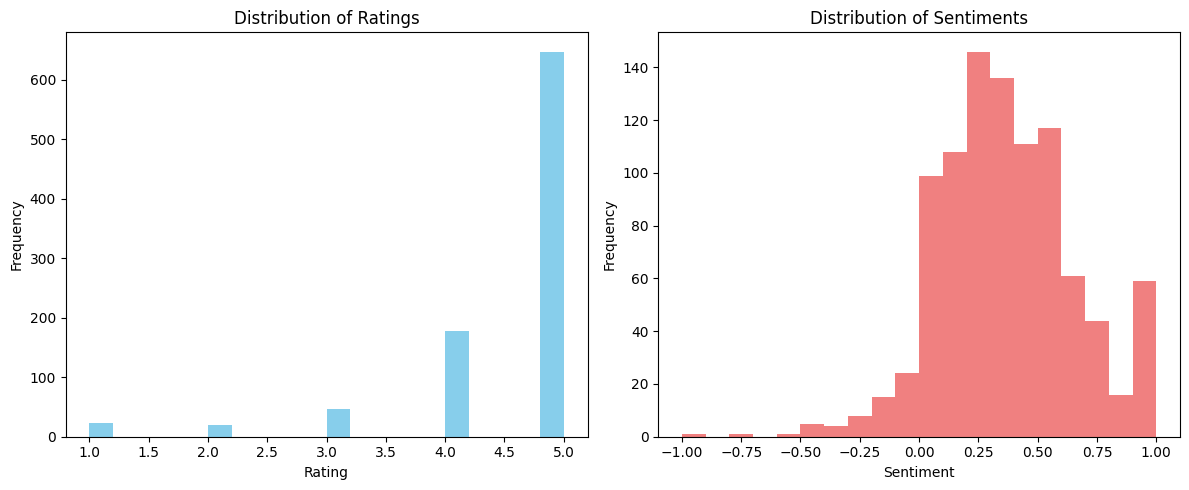

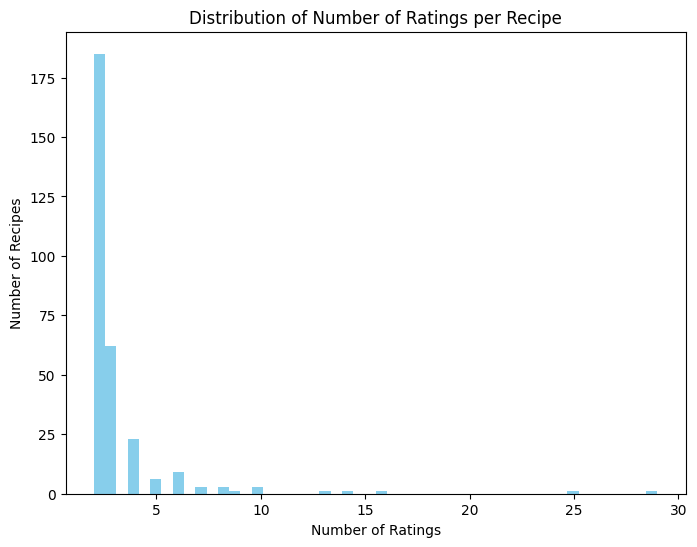

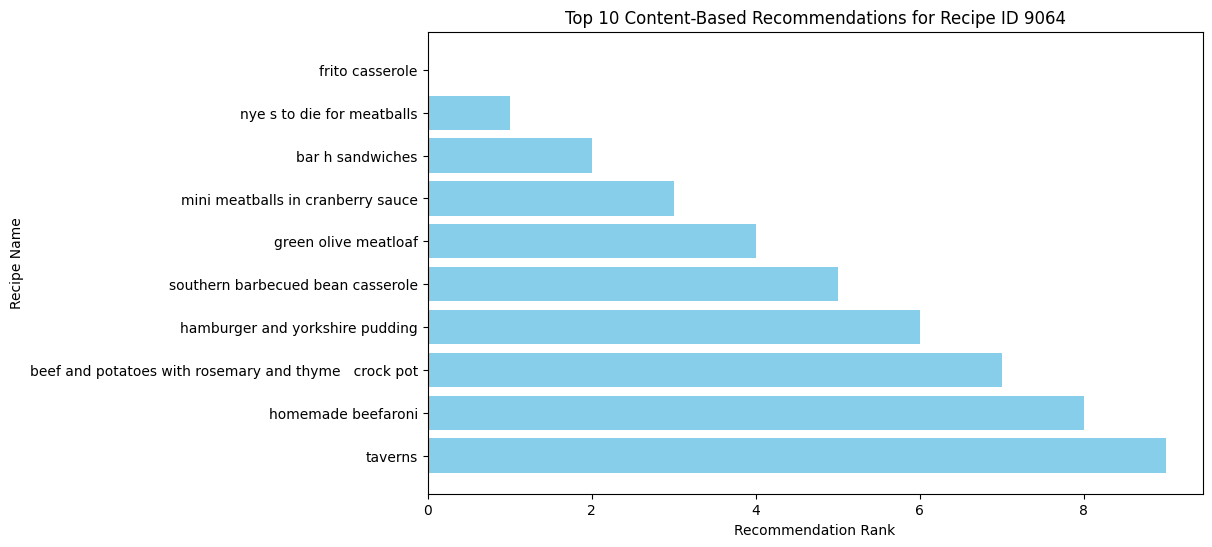

In [ ]:
# Import for visializations

import matplotlib.pyplot as plt

# Visualize RMSE for Collaborative Filtering and Random Predictor
rmse_values = {
    "Collaborative Filtering": accuracy.rmse(predictions),
    "Random Predictor": accuracy.rmse(random_predictions),
    "Average Predictor":accuracy.rmse(average_predictions)
}

plt.figure(figsize=(8, 6))
plt.bar(rmse_values.keys(), rmse_values.values(), color=['skyblue', 'lightcoral', 'palegreen'])
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE Comparison of Collaborative Filtering and Random Predictor")
plt.ylim(0, max(rmse_values.values()) + 0.1)  # Adjust y-axis limit for better visualization
for i, v in enumerate(rmse_values.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', va='bottom')
plt.show()

# Visualize distribution of ratings and sentiments
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_2001_i['rating'], bins=20, color='skyblue')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")

plt.subplot(1, 2, 2)
plt.hist(df_2001_i['sentiment'], bins=20, color='lightcoral')
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiments")

plt.tight_layout()
plt.show()

# Visualize the number of ratings per recipe
plt.figure(figsize=(8, 6))
plt.hist(df_2001_r['number_of_ratings'], bins=50, color='skyblue')
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Recipes")
plt.title("Distribution of Number of Ratings per Recipe")
plt.show()

# Visualize top recommended recipes (example using recipe ID 9064)
recommendations = get_recommendations(9064)
if isinstance(recommendations, pd.Series):
    plt.figure(figsize=(10, 6))
    plt.barh(recommendations.values[::-1], range(len(recommendations)), color='skyblue') # Horizontal bar chart
    plt.xlabel("Recommendation Rank")
    plt.ylabel("Recipe Name")
    plt.title("Top 10 Content-Based Recommendations for Recipe ID 9064")
    plt.gca().invert_yaxis()
    plt.show()
else:
    recommendations